<a href="https://colab.research.google.com/github/Nishanth-developer/ML_IEEE_CAS/blob/main/20BCE0118_Nishanth_IEEE_CAS_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
X = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])
Y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

In [ ]:
X_train=X[0:14]
Y_train=Y[0:14]
X_test=X[14:19]
Y_test=Y[14:19]
X_train=np.reshape(X_train,(14,1))
X_test=np.reshape(X_test,(4,1))
main_dict=dict()

In [ ]:
l_model=LinearRegression()
l_model.fit(X_train,Y_train)
Y_pred_l=l_model.predict(X_test)
u1=np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_l))
main_dict['Linear_Regression']=u1

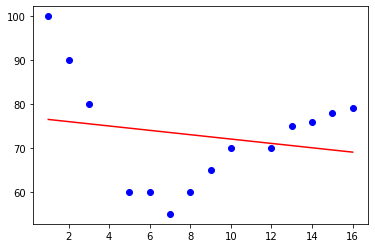

In [ ]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,l_model.predict(X_train),color='red')

In [ ]:
p_model=PolynomialFeatures(degree=4)
p_model1=PolynomialFeatures(degree=2)
p_model2=PolynomialFeatures(degree=3)
Xp1=p_model1.fit_transform(X_train)
Xp2=p_model2.fit_transform(X_train)
Xp=p_model.fit_transform(X_train)
print(pd.DataFrame(Xp))

      0     1      2       3        4
0   1.0   1.0    1.0     1.0      1.0
1   1.0   2.0    4.0     8.0     16.0
2   1.0   3.0    9.0    27.0     81.0
3   1.0   5.0   25.0   125.0    625.0
4   1.0   6.0   36.0   216.0   1296.0
5   1.0   7.0   49.0   343.0   2401.0
6   1.0   8.0   64.0   512.0   4096.0
7   1.0   9.0   81.0   729.0   6561.0
8   1.0  10.0  100.0  1000.0  10000.0
9   1.0  12.0  144.0  1728.0  20736.0
10  1.0  13.0  169.0  2197.0  28561.0
11  1.0  14.0  196.0  2744.0  38416.0
12  1.0  15.0  225.0  3375.0  50625.0
13  1.0  16.0  256.0  4096.0  65536.0


In [ ]:
plreg=LinearRegression()
plreg1=LinearRegression()
plreg2=LinearRegression()
plreg.fit(Xp,Y_train)
plreg1.fit(Xp1,Y_train)
plreg2.fit(Xp2,Y_train)
u2=np.sqrt(metrics.mean_squared_error(Y_test, plreg.predict(p_model.fit_transform(X_test))))
u3=np.sqrt(metrics.mean_squared_error(Y_test, plreg2.predict(p_model2.fit_transform(X_test))))
u4=np.sqrt(metrics.mean_squared_error(Y_test, plreg1.predict(p_model1.fit_transform(X_test))))
main_dict['Polynomial_Regression_d4']=u2
main_dict['Polynomial_Regression_d3']=u3
main_dict['Polynomial_Regression_d2']=u4

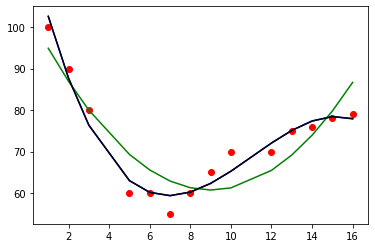

In [ ]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,plreg.predict(p_model.fit_transform(X_train)),color='blue')
plt.plot(X_train,plreg1.predict(p_model1.fit_transform(X_train)),color='green')
plt.plot(X_train,plreg2.predict(p_model2.fit_transform(X_train)),color='black')
plt.show()

In [ ]:
xs1=StandardScaler()
ys1=StandardScaler()
yd=np.reshape(Y_train,(14,1))
xs=xs1.fit_transform(X_train)
ys=ys1.fit_transform(yd)

In [ ]:
s_model=SVR(kernel='rbf')
s_model.fit(xs,ys)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

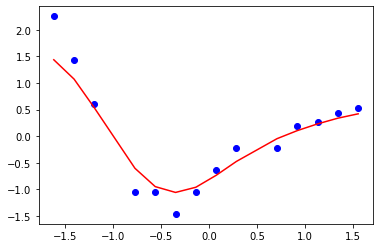

In [ ]:
main_dict['SVR model']=np.sqrt(metrics.mean_squared_error(Y_test, s_model.predict(X_test)))
plt.scatter(xs,ys,color='blue')
plt.plot(xs,s_model.predict(xs),color='red')

In [ ]:
d_model=DecisionTreeRegressor(random_state=0)
d_model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

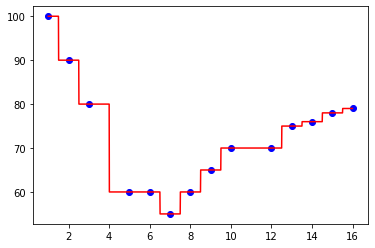

In [ ]:
X_grid=np.arange(min(X_train),max(X_train),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_grid,d_model.predict(X_grid),color='red')
main_dict['Decision tree model']=np.sqrt(metrics.mean_squared_error(Y_test, d_model.predict(X_test)))

In [ ]:
r_model=RandomForestRegressor(n_estimators=300,random_state=0)
r_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

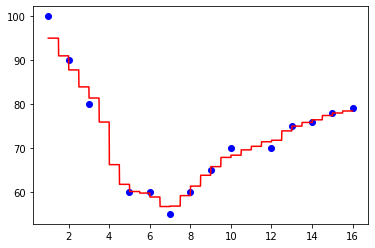

In [ ]:
X_grid=np.arange(min(X_train),max(X_train),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_grid,r_model.predict(X_grid),color='red')
main_dict['Random forest model']=np.sqrt(metrics.mean_squared_error(Y_test, r_model.predict(X_test)))

In [ ]:
minn=min(main_dict.values())
for i,j in main_dict.items():
  if j==minn:
    print(f"The model with highest performance is {i} with RMSE of {j}.")
    break

The model with highest performance is Decision tree model with RMSE of 18.452642087245934.


Reference::

In [ ]:
main_dict

{'Decision tree model': 18.452642087245934,
 'Linear_Regression': 30.288235320094213,
 'Polynomial_Regression_d2': 33.11110542815719,
 'Polynomial_Regression_d3': 54.388898795826115,
 'Polynomial_Regression_d4': 56.549181668882284,
 'Random forest model': 19.009074148942652,
 'SVR model': 96.77144389770866}